In [5]:
# Install necessary libraries
%pip install geopandas rasterio folium earthengine-api

# Import libraries
import ee
import folium
import geopandas as gpd

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-celestakim019')

# Load shapefile (Ensure TIGANIA.shp exists in /content/)
shapefile_path = "/content/TIGANIA.shp"
gdf = gpd.read_file(shapefile_path)

# Get bounding geometry of TIGANIA
tigania_geom = ee.Geometry.Polygon(gdf.geometry.iloc[0].__geo_interface__["coordinates"])

# Load and clip Sentinel-2 Harmonized imagery
sentinel = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(tigania_geom) \
    .filterDate('2024-01-01', '2024-12-31') \
    .median() \
    .clip(tigania_geom)  # Clipping to TIGANIA region

# Visualization parameters (True Color RGB)
vis_params = {
    'bands': ['B4', 'B3', 'B2'],  # True Color
    'min': 0,
    'max': 3000,
    'gamma': 1.4
}

# Define function to add Earth Engine imagery to Folium
def add_ee_layer(map_object, image, vis_params):
    map_id = image.getMapId(vis_params)
    folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name='Clipped Sentinel-2',
        overlay=True
    ).add_to(map_object)

# Create map centered at TIGANIA region
centroid = gdf.geometry.centroid.iloc[0]
map = folium.Map(location=[centroid.y, centroid.x], zoom_start=10)

# Add clipped Sentinel-2 layer
add_ee_layer(map, sentinel, vis_params)

# Display the map
map



<ipython-input-5-34f8ae37470e>:46: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]


In [7]:
# Install necessary libraries
%pip install geopandas rasterio folium earthengine-api

# Import Libraries
import ee
import folium
import geopandas as gpd

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-celestakim019')

# Load TIGANIA shapefile
shapefile_path = "/content/TIGANIA.shp"
gdf = gpd.read_file(shapefile_path)

# Convert shapefile boundary to Earth Engine format
tigania_geom = ee.Geometry.Polygon(gdf.geometry.iloc[0].__geo_interface__["coordinates"])

# Load Sentinel-2 Harmonized imagery and clip to TIGANIA
sentinel = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(tigania_geom) \
    .filterDate('2024-01-01', '2024-12-31') \
    .median() \
    .clip(tigania_geom)

# Compute NDVI using Near-Infrared (B8) and Red (B4)
ndvi = sentinel.normalizedDifference(['B8', 'B4']).rename('NDVI')

# Visualization parameters for NDVI
ndvi_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['blue', 'white', 'green']  # Low NDVI (blue), High NDVI (green)
}

# Define function to add Earth Engine layers to Folium Map
def add_ee_layer(map_object, image, vis_params, layer_name):
    map_id = image.getMapId(vis_params)
    folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=layer_name,
        overlay=True
    ).add_to(map_object)

# Create map centered at TIGANIA region
centroid = gdf.geometry.centroid.iloc[0]
map = folium.Map(location=[centroid.y, centroid.x], zoom_start=10)

# Add NDVI layer to the map
add_ee_layer(map, ndvi, ndvi_vis_params, "NDVI")

# Display map
map


<ipython-input-7-a1a143e20dee>:48: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]


In [8]:
# Install necessary libraries
%pip install geopandas rasterio folium earthengine-api

# Import Libraries
import ee
import folium
import geopandas as gpd # type: ignore

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-celestakim019')

# Load TIGANIA shapefile
shapefile_path = "/content/TIGANIA.shp"
gdf = gpd.read_file(shapefile_path)

# Convert shapefile boundary to Earth Engine format
tigania_geom = ee.Geometry.Polygon(gdf.geometry.iloc[0].__geo_interface__["coordinates"])

# Load Sentinel-2 Harmonized imagery and clip to TIGANIA
sentinel = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(tigania_geom) \
    .filterDate('2024-01-01', '2024-12-31') \
    .median() \
    .clip(tigania_geom)

# Compute NDVI using Near-Infrared (B8) and Red (B4)
ndvi = sentinel.normalizedDifference(['B8', 'B4']).rename('NDVI')

# Visualization parameters
true_color_vis_params = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000, 'gamma': 1.4}
ndvi_vis_params = {'min': -1, 'max': 1, 'palette': ['blue', 'white', 'green']}

# Define function to add Earth Engine layers to Folium Map
def add_ee_layer(map_object, image, vis_params, layer_name):
    map_id = image.getMapId(vis_params)
    folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=layer_name,
        overlay=True
    ).add_to(map_object)

# Create map centered at TIGANIA region
centroid = gdf.geometry.centroid.iloc[0]
map = folium.Map(location=[centroid.y, centroid.x], zoom_start=10)

# Add TIGANIA boundary layer
geojson_data = gdf.to_json()
folium.GeoJson(geojson_data, name="TIGANIA Boundary", style_function=lambda x: {'color': 'black', 'weight': 2}).add_to(map)

# Add Sentinel-2 True Color imagery
add_ee_layer(map, sentinel, true_color_vis_params, "Sentinel-2 True Color")

# Add NDVI layer
add_ee_layer(map, ndvi, ndvi_vis_params, "NDVI")

# Layer control to toggle visibility
folium.LayerControl().add_to(map)

# Display map
map


<ipython-input-8-c58df59cb53a>:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]


In [17]:
# Install necessary libraries
%pip install geopandas rasterio folium earthengine-api

# Import Libraries
import ee
import folium
import geopandas as gpd

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-celestakim019')

# Load TIGANIA shapefile
shapefile_path = "/content/TIGANIA.shp"
gdf = gpd.read_file(shapefile_path)

# Convert shapefile boundary to Earth Engine format
tigania_geom = ee.Geometry.Polygon(gdf.geometry.iloc[0].__geo_interface__["coordinates"])

# Load Sentinel-2 Harmonized imagery and clip to TIGANIA
sentinel = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(tigania_geom) \
    .filterDate('2024-01-01', '2024-12-31') \
    .median() \
    .clip(tigania_geom)

# Compute NDVI using Near-Infrared (B8) and Red (B4)
ndvi = sentinel.normalizedDifference(['B8', 'B4']).rename('NDVI')

# Define NDVI Classification with 5 classes
ndvi_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['blue', 'brown', 'yellow', 'lightgreen', 'darkgreen']  # Custom 5-class NDVI colors
}

# Function to add Earth Engine layers to Folium Map
def add_ee_layer(map_object, image, vis_params, layer_name):
    map_id = image.getMapId(vis_params)
    folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=layer_name,
        overlay=True
    ).add_to(map_object)

# Create map centered at TIGANIA region
centroid = gdf.geometry.centroid.iloc[0]
map = folium.Map(location=[centroid.y, centroid.x], zoom_start=10)

# Add NDVI Classified Layer
add_ee_layer(map, ndvi, ndvi_vis_params, "NDVI Classification (5 Classes)")

# Layer control to toggle visibility
folium.LayerControl().add_to(map)

# Display map
map


<ipython-input-17-7b72ebbcf843>:48: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]


In [10]:
# Install necessary libraries
%pip install geopandas rasterio folium earthengine-api

# Import Libraries
import ee
import folium
import geopandas as gpd

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-celestakim019')

# Load TIGANIA shapefile
shapefile_path = "/content/TIGANIA.shp"
gdf = gpd.read_file(shapefile_path)

# Convert shapefile boundary to Earth Engine format
tigania_geom = ee.Geometry.Polygon(gdf.geometry.iloc[0].__geo_interface__["coordinates"])

# Load Sentinel-2 Harmonized imagery and clip to TIGANIA
sentinel = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(tigania_geom) \
    .filterDate('2024-01-01', '2024-12-31') \
    .median() \
    .clip(tigania_geom)

# Compute NDVI using Near-Infrared (B8) and Red (B4)
ndvi = sentinel.normalizedDifference(['B8', 'B4']).rename('NDVI')

# Define NDVI Classification with 5 classes
ndvi_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['blue', 'brown', 'yellow', 'lightgreen', 'darkgreen']  # Custom 5-class NDVI colors
}

# Function to add Earth Engine layers to Folium Map
def add_ee_layer(map_object, image, vis_params, layer_name):
    map_id = image.getMapId(vis_params)
    folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=layer_name,
        overlay=True
    ).add_to(map_object)

# Create map centered at TIGANIA region
centroid = gdf.geometry.centroid.iloc[0]
map = folium.Map(location=[centroid.y, centroid.x], zoom_start=10)

# Add NDVI Classified Layer
add_ee_layer(map, ndvi, ndvi_vis_params, "NDVI Classification (5 Classes)")

# Layer control to toggle visibility
folium.LayerControl().add_to(map)

# Define Custom Legend for NDVI Classes
legend_html = """
<div style="position: fixed;
            bottom: 10px; left: 10px; width: 180px; height: 130px;
            background-color: white; z-index:9999; font-size:12px;
            border: 2px solid black; padding: 10px;">
<b>NDVI Classification</b><br>
<div style="background: blue; width: 15px; height: 15px; display: inline-block;"></div> Non-Vegetated (-1.0 to 0.0)<br>
<div style="background: brown; width: 15px; height: 15px; display: inline-block;"></div> Stressed Vegetation (0.0 to 0.2)<br>
<div style="background: yellow; width: 15px; height: 15px; display: inline-block;"></div> Moderately Healthy (0.2 to 0.4)<br>
<div style="background: lightgreen; width: 15px; height: 15px; display: inline-block;"></div> Healthy Vegetation (0.4 to 0.6)<br>
<div style="background: darkgreen; width: 15px; height: 15px; display: inline-block;"></div> Very Healthy Vegetation (0.6 to 1.0)<br>
</div>
"""

# Add Legend to Map
map.get_root().html.add_child(folium.Element(legend_html))

# Display map
map


<ipython-input-10-b328f096a9bc>:48: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]


In [11]:
# Install necessary libraries (run this in a Jupyter/Colab environment if not already installed)
%pip install geopandas rasterio folium earthengine-api

# Import Libraries
import ee
import folium
import geopandas as gpd

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-celestakim019')

# Load TIGANIA shapefile
shapefile_path = "/content/TIGANIA.shp"
gdf = gpd.read_file(shapefile_path)

# Convert shapefile boundary to Earth Engine format
tigania_geom = ee.Geometry.Polygon(gdf.geometry.iloc[0].__geo_interface__["coordinates"])

# Load Sentinel-2 Harmonized imagery and clip to TIGANIA
sentinel = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(tigania_geom) \
    .filterDate('2024-01-01', '2024-12-31') \
    .median() \
    .clip(tigania_geom)

# Compute NDVI using Near-Infrared (B8) and Red (B4)
ndvi = sentinel.normalizedDifference(['B8', 'B4']).rename('NDVI')

# Define NDVI Classification with 5 classes
ndvi_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['blue', 'brown', 'yellow', 'lightgreen', 'darkgreen']  # Custom 5-class NDVI colors
}

# Function to add Earth Engine layers to Folium Map
def add_ee_layer(map_object, image, vis_params, layer_name):
    map_id = image.getMapId(vis_params)
    folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=layer_name,
        overlay=True
    ).add_to(map_object)

# Create map centered at TIGANIA region
centroid = gdf.geometry.centroid.iloc[0]
map = folium.Map(location=[centroid.y, centroid.x], zoom_start=10)

# Add NDVI Classified Layer
add_ee_layer(map, ndvi, ndvi_vis_params, "NDVI Classification (5 Classes)")

# Layer control to toggle visibility
folium.LayerControl().add_to(map)

# Define Custom Legend for NDVI Classes with adjusted size and styling
legend_html = """
<div style="position: fixed;
            bottom: 20px; left: 20px; width: 200px; height: 140px;
            background-color: rgba(255, 255, 255, 0.9); z-index:9999; font-size:12px;
            border: 2px solid #333; border-radius: 5px; padding: 10px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
<b>NDVI Classification</b><br>
<div style="background: blue; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Non-Vegetated (-1.0 to 0.0)<br>
<div style="background: brown; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Stressed Vegetation (0.0 to 0.2)<br>
<div style="background: yellow; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Moderately Healthy (0.2 to 0.4)<br>
<div style="background: lightgreen; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Healthy Vegetation (0.4 to 0.6)<br>
<div style="background: darkgreen; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Very Healthy Vegetation (0.6 to 1.0)<br>
</div>
"""

# Add Legend to Map
map.get_root().html.add_child(folium.Element(legend_html))

# Display map
map

<ipython-input-11-79ca755ef873>:48: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]


In [13]:
# Install necessary libraries (run this in a Jupyter/Colab environment if not already installed)
!pip install geopandas rasterio folium earthengine-api

# Import Libraries
import ee
import folium
import geopandas as gpd

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-celestakim019')

# Load TIGANIA shapefile
shapefile_path = "/content/TIGANIA.shp"
gdf = gpd.read_file(shapefile_path)

# Convert shapefile boundary to Earth Engine format
tigania_geom = ee.Geometry.Polygon(gdf.geometry.iloc[0].__geo_interface__["coordinates"])

# Load Sentinel-2 Harmonized imagery and clip to TIGANIA
sentinel = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(tigania_geom) \
    .filterDate('2024-01-01', '2024-12-31') \
    .median() \
    .clip(tigania_geom)

# Compute NDVI using Near-Infrared (B8) and Red (B4)
ndvi = sentinel.normalizedDifference(['B8', 'B4']).rename('NDVI')

# Define NDVI Classification with 5 classes
ndvi_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['red', 'brown', 'yellow', 'green', 'darkgreen']  # Updated 5-class NDVI colors
}

# Function to add Earth Engine layers to Folium Map
def add_ee_layer(map_object, image, vis_params, layer_name):
    map_id = image.getMapId(vis_params)
    folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=layer_name,
        overlay=True
    ).add_to(map_object)

# Create map centered at TIGANIA region
centroid = gdf.geometry.centroid.iloc[0]
map = folium.Map(location=[centroid.y, centroid.x], zoom_start=10)

# Add NDVI Classified Layer
add_ee_layer(map, ndvi, ndvi_vis_params, "NDVI Classification (5 Classes)")

# Layer control to toggle visibility
folium.LayerControl().add_to(map)

# Define Custom Legend with two sections: Colors and Classes, and Classes with Values
legend_html = """
<div style="position: fixed;
            bottom: 20px; left: 20px; width: 260px; height: 360px;
            background-color: rgba(255, 255, 255, 0.9); z-index:9999; font-size:12px;
            border: 2px solid #333; border-radius: 5px; padding: 10px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
<b>NDVI Classification</b><br><br>
<b>Colors and Classes</b><br>
<div style="background: red; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Non-Vegetated<br>
<div style="background: brown; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Stressed Vegetation<br>
<div style="background: yellow; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Moderately Healthy<br>
<div style="background: green; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Healthy Vegetation<br>
<div style="background: darkgreen; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Very Healthy Vegetation<br><br>
<b>Classes and Values</b><br>
<span style="display: inline-block; width: 150px;">Non-Vegetated</span> <span>-1.0 to 0.0</span><br>
<span style="display: inline-block; width: 150px;">Stressed Vegetation</span> <span>0.0 to 0.2</span><br>
<span style="display: inline-block; width: 150px;">Moderately Healthy</span> <span>0.2 to 0.4</span><br>
<span style="display: inline-block; width: 150px;">Healthy Vegetation</span> <span>0.4 to 0.6</span><br>
<span style="display: inline-block; width: 150px;">Very Healthy Vegetation</span> <span>0.6 to 1.0</span><br>
</div>
"""

# Add Legend to Map
map.get_root().html.add_child(folium.Element(legend_html))

# Display map
map

<ipython-input-13-7caabced25d2>:48: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]


In [16]:
# Install necessary libraries
%pip install geopandas rasterio folium earthengine-api

# Import Libraries
import ee
import folium
import geopandas as gpd

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-celestakim019')

# Load TIGANIA shapefile
shapefile_path = "/content/TIGANIA.shp"
gdf = gpd.read_file(shapefile_path)

# Optional: Apply a filter to the shapefile (pseudo "definition query")
# Example: Filter features where LAND_USE = 'Agriculture' (update field/value as needed)
# Comment out if no filtering is required
# gdf = gdf[gdf['LAND_USE'] == 'Agriculture']  # Replace 'LAND_USE' with actual field name

# Convert shapefile boundary to Earth Engine format
# Use the first geometry or dissolve if multiple features exist
tigania_geom = ee.Geometry.Polygon(gdf.geometry.iloc[0].__geo_interface__["coordinates"])

# Load Sentinel-2 Harmonized imagery and clip to TIGANIA
sentinel = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(tigania_geom) \
    .filterDate('2024-01-01', '2024-12-31') \
    .median() \
    .clip(tigania_geom)

# Compute NDVI using Near-Infrared (B8) and Red (B4)
ndvi = sentinel.normalizedDifference(['B8', 'B4']).rename('NDVI')

# Filter NDVI values below 0.1 to focus on 0.1 to 1 range
ndvi = ndvi.where(ndvi.lt(0.1), 0.1)  # Set values < 0.1 to 0.1

# Define NDVI Classification with 5 classes for 0.1 to 1
ndvi_vis_params = {
    'min': 0.1,
    'max': 1.0,
    'palette': ['red', 'brown', 'yellow', 'green', 'darkgreen']  # 5-class NDVI colors
}

# Function to add Earth Engine layers to Folium Map
def add_ee_layer(map_object, image, vis_params, layer_name):
    map_id = image.getMapId(vis_params)
    folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=layer_name,
        overlay=True
    ).add_to(map_object)

# Create map centered at TIGANIA region
centroid = gdf.geometry.centroid.iloc[0]
map = folium.Map(location=[centroid.y, centroid.x], zoom_start=10)

# Add NDVI Classified Layer
add_ee_layer(map, ndvi, ndvi_vis_params, "NDVI Classification (5 Classes)")

# Layer control to toggle visibility
folium.LayerControl().add_to(map)

# Define Custom Legend with two sections: Colors and Classes, and Classes with Values
legend_html = """
<div style="position: fixed;
            bottom: 20px; left: 20px; width: 260px; height: 300px;
            background-color: rgba(255, 255, 255, 0.9); z-index:9999; font-size:12px;
            border: 2px solid #333; border-radius: 5px; padding: 10px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
<b>NDVI Classification</b><br><br>
<b>Colors and Classes</b><br>
<div style="background: red; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Non-Vegetated<br>
<div style="background: brown; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Stressed Vegetation<br>
<div style="background: yellow; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Moderately Healthy<br>
<div style="background: green; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Healthy Vegetation<br>
<div style="background: darkgreen; width: 14px; height: 14px; display: inline-block; margin-right: 5px;"></div> Very Healthy Vegetation<br><br>
<b>Classes and Values</b><br>
<span style="display: inline-block; width: 150px;">Non-Vegetated</span> <span>0.1 to 0.28</span><br>
<span style="display: inline-block; width: 150px;">Stressed Vegetation</span> <span>0.28 to 0.46</span><br>
<span style="display: inline-block; width: 150px;">Moderately Healthy</span> <span>0.46 to 0.64</span><br>
<span style="display: inline-block; width: 150px;">Healthy Vegetation</span> <span>0.64 to 0.82</span><br>
<span style="display: inline-block; width: 150px;">Very Healthy Vegetation</span> <span>0.82 to 1.0</span><br>
</div>
"""

# Add Legend to Map
map.get_root().html.add_child(folium.Element(legend_html))

# Display map
map

<ipython-input-16-c667989b6c8e>:57: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid.iloc[0]


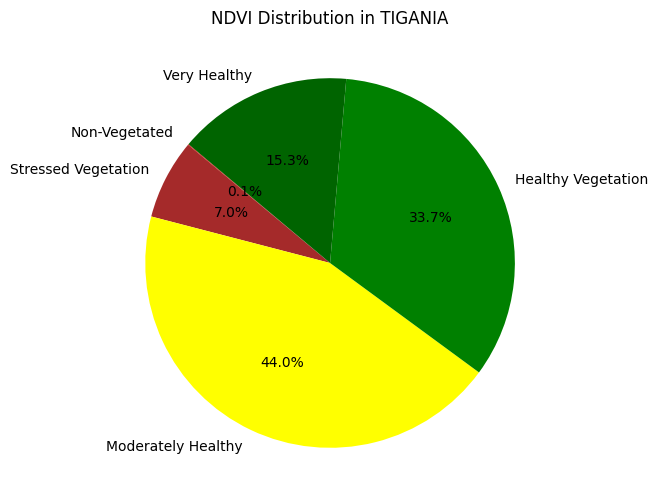

In [19]:
# Install necessary libraries
%pip install geopandas rasterio folium earthengine-api matplotlib

# Import Libraries
import ee
import folium
import geopandas as gpd
import matplotlib.pyplot as plt

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-celestakim019')

# Load TIGANIA shapefile
shapefile_path = "/content/TIGANIA.shp"
gdf = gpd.read_file(shapefile_path)

# Convert shapefile boundary to Earth Engine format
tigania_geom = ee.Geometry.Polygon(gdf.geometry.iloc[0].__geo_interface__["coordinates"])

# Load Sentinel-2 Harmonized imagery and clip to TIGANIA
sentinel = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(tigania_geom) \
    .filterDate('2024-01-01', '2024-12-31') \
    .median() \
    .clip(tigania_geom)

# Compute NDVI using Near-Infrared (B8) and Red (B4)
ndvi = sentinel.normalizedDifference(['B8', 'B4']).rename('NDVI')

# Define NDVI Classes
ndvi_classes = [
    ndvi.lt(0.1),  # Non-Vegetated
    ndvi.gte(0.1).And(ndvi.lt(0.28)),  # Stressed Vegetation
    ndvi.gte(0.28).And(ndvi.lt(0.46)),  # Moderately Healthy
    ndvi.gte(0.46).And(ndvi.lt(0.64)),  # Healthy Vegetation
    ndvi.gte(0.64)  # Very Healthy Vegetation
]

# Get NDVI Class Areas
# Extract the numerical area values from the dictionaries
areas = [ndvi.updateMask(c).reduceRegion(ee.Reducer.sum(), tigania_geom, 30).get('NDVI').getInfo() for c in ndvi_classes]

# Define Labels and Colors for Pie Chart
labels = ["Non-Vegetated", "Stressed Vegetation", "Moderately Healthy", "Healthy Vegetation", "Very Healthy"]
colors = ["red", "brown", "yellow", "green", "darkgreen"]

# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(areas, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("NDVI Distribution in TIGANIA")
plt.show()

In [4]:

import ee
import geemap

# Authenticate and initialize Earth Engine
ee.Initialize(project='ee-celestakim019')

# Define export parameters
ndvi_export_task = geemap.ee_export_image(
    image=ndvi,
    filename="C:/Users/Administrator/Desktop/GIS/tigania_project/TIGANIA_NDVI.tif",  # Update with your desired path
    scale=30,  # Resolution
    region=tigania_geom.bounds(),
    file_per_band=False  # Set to True if you want separate bands
)

print("Download completed! Check your folder.")


Please restart Jupyter kernel after installation if you encounter any errors when importing geemap.


ModuleNotFoundError: No module named 'pkg_resources'